In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def plot_metrics_curve(task, ax):
    log_file = f"log_{task}.txt"
    with open(log_file, "r") as f:
        lines = f.read().split("\n")
        
    train_lines = [line for line in lines if "train" in line]
    valid_lines = [line for line in lines if "valid" in line]
    
    def extract_epoch(line):
        epoch, loss, mAP = line.split(", ")
        
        epoch = epoch.split(": ")[1]
        epoch = int(epoch)
        
        return epoch
    
    
    def extract_loss(line):
        epoch, loss, mAP = line.split(", ")
        
        loss = loss.split(": ")[1]
        loss = float(loss)
        
        return loss
    
    def extract_mAP(line):
        epoch, loss, mAP = line.split(", ")
        
        mAP = mAP.split(": ")[1]
        mAP = float(mAP)
            
        return mAP
    
    
    epochs = [extract_epoch(line) for line in train_lines]
    
    train_loss = [extract_loss(line) for line in train_lines]
    train_mAP = [extract_mAP(line) for line in train_lines]
    
    valid_loss = [extract_loss(line) for line in valid_lines]
    valid_mAP = [extract_mAP(line) for line in valid_lines]
    
    ax.plot(epochs, train_mAP, color="red", label="train mAP")
    ax.plot(epochs, valid_mAP, color="blue", label="valid mAP")
    ax.set_xlabel("Epochs", fontsize=20)
    ax.set_ylabel("Metrics", fontsize=20)
    ax.set_title(task, fontsize=30)
    ax.legend()
    
    print(max(valid_mAP))

0.015370081178843975


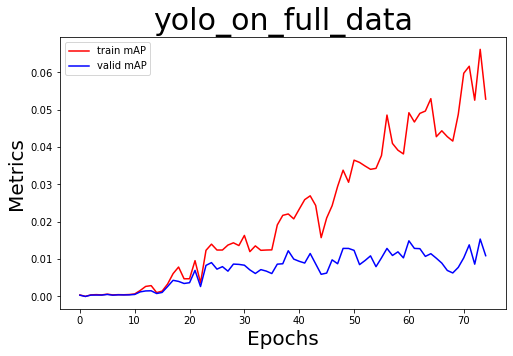

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_metrics_curve("yolo_on_full_data", ax=ax)

0.030180608853697777


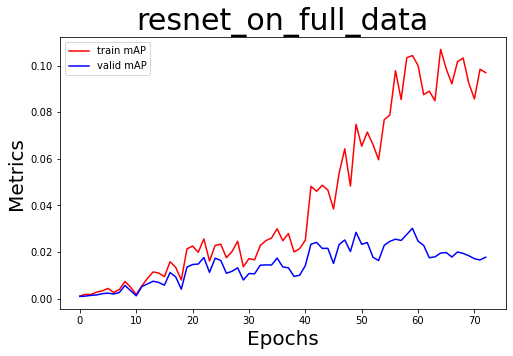

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_metrics_curve("resnet_on_full_data", ax=ax)